In [3]:
import os
import matplotlib.pyplot as plt
import math
import numpy as np
import pandas as pd
import Preprocessing as pp

In [13]:
TOTAL_TIME = 12231 #total time for experiment in seconds
SAMPLING_RATE = 1 #number of samples per seconds wished (so 0.5 for a sample every 2 seconds)
sample_size = math.ceil(TOTAL_TIME*SAMPLING_RATE) +1 # +1 for starting and end point
time_downsampled = np.arange(sample_size) 

OPEN_FOLDER = "../Data/Raw_Data/" # where are the raw matlab files?
SAVE_FOLDER = "../Data/Temp_Data/Messdaten_Test_ID_4B/" # where do you want to save the .csv files

open_4b = OPEN_FOLDER + "Messdaten_Test_ID_4b/"
open_9 = OPEN_FOLDER + "Messdaten_Test_ID_9/"

pp.checkFolder(SAVE_FOLDER)

Folder already exists.


In [24]:
def prepData4B(data, endtime):
    df = pd.DataFrame()
    time, input_voltage = pp.fillData(data[0]['t_nsoll_stil'], data[0]['sw_nsoll_stil'])
    dummy, spinning_soll = pp.fillData(data[0]['t_nsoll_stil'], data[0]['n_4b_soll'])
    dummy, el_power = pp.fillData(data[1]['t_1B_el_neu'], data[1]['P_el_rms'])
    dummy, el_power_approx = pp.fillData(data[1]['t_elstil'], data[1]['P_elstil'])
    th_power = pp.downsampleData(data[1]['t_1B_el_neu'], data[1]['P_th'][::2])[:endtime]
    dummy, th_power_approx = pp.fillData(data[1]['t_thstil'], data[1]['P_thstil'])
    
    time = time[:endtime]
    input_voltage = input_voltage[:endtime]
    spinning_soll = spinning_soll[:endtime]
    el_power = el_power[:endtime]
    el_power_approx = el_power_approx[:endtime]
    th_power = th_power[:endtime]
    th_power_approx = th_power_approx[:endtime]
    
    df['time'] = time
    df['input_voltage'] = input_voltage
    df['spinning_soll'] = spinning_soll
    df['el_power'] = el_power
    df['el_power_approx'] = el_power_approx
    df['th_power'] = th_power[:,1]
    df['th_power_approx'] = th_power_approx
    
    return df

In [120]:
def prepData9(data, endtime):
    df = pd.DataFrame()
    time = pp.downsampleData(data[0]['t_n'], data[0]['t_n'],sample_size=endtime)[:, 1]
    input_voltage = pp.downsampleData(data[0]['t_n'], data[0]['u_ary'], sample_size=endtime)[:, 1]
    spinning_soll = pp.downsampleData(data[0]['t_n'], data[0]['n_soll'], sample_size=endtime)[:, 1]
    el_power = pp.downsampleData(data[1]['t_pel'][::2], data[1]['P_el_rms'][::2], sample_size=endtime)[:,1]
    el_power_approx = pp.downsampleData(data[1]['t_pel'][::2], data[1]['p_pel'][::2], sample_size=endtime)[:,1]
    th_power = pp.downsampleData(data[1]['t_n_th'], data[1]['P_th_mean'], sample_size=endtime)[:,1]
    dummy, th_power_approx = pp.fillData(data[1]['t_pth'][::2], data[1]['p_pth'][::2])
    
    print(len(input_voltage))
    print(len(th_power_approx))
    
    time = time[:endtime]
    input_voltage = input_voltage[:endtime]
    spinning_soll = spinning_soll[:endtime]
    el_power = el_power[:endtime]
    el_power_approx = el_power_approx[:endtime]
    th_power = th_power[:endtime]
    th_power_approx = th_power_approx[:endtime]
    
    df['time'] = time
    df['input_voltage'] = input_voltage
    df['spinning_soll'] = spinning_soll
    df['el_power'] = el_power
    df['el_power_approx'] = el_power_approx
    df['th_power'] = th_power
    df['th_power_approx'] = th_power_approx
    
    return df

In [99]:
def plotCrossPlots(df):
    fig, axs = plt.subplots(len(df.columns), len(df.columns), figsize = (30,30))
    axs = axs.ravel()
    for i in range(len(df.columns)):
        for j in range(len(df.columns)):
            number = i*len(df.columns) + j
            axs[number].plot(df[df.columns[i]], df[df.columns[j]])
            axs[number].set_title(df.columns[i] + " (x) + " + df.columns[j])
    plt.show()

# Prepare and Plot Data according to Test_ID_4b

In [100]:
raw_data_4b = pp.openMatfiles(open_4b)

Drehzahldaten_Test_ID_4b.mat
Leistungdaten_Test_ID_4b.mat


In [101]:
data_spinning_4b = raw_data_4b['Drehzahldaten_Test_ID_4b']
data_power_4b = raw_data_4b['Leistungdaten_Test_ID_4b']
data_4b = [data_spinning_4b, data_power_4b]

In [102]:
df_4b = prepData4B(data_4b, 11290)
df_4b.to_csv(SAVE_FOLDER + 'experiment_4b.csv',
         index = False, sep =  "|", encoding = "utf-8")

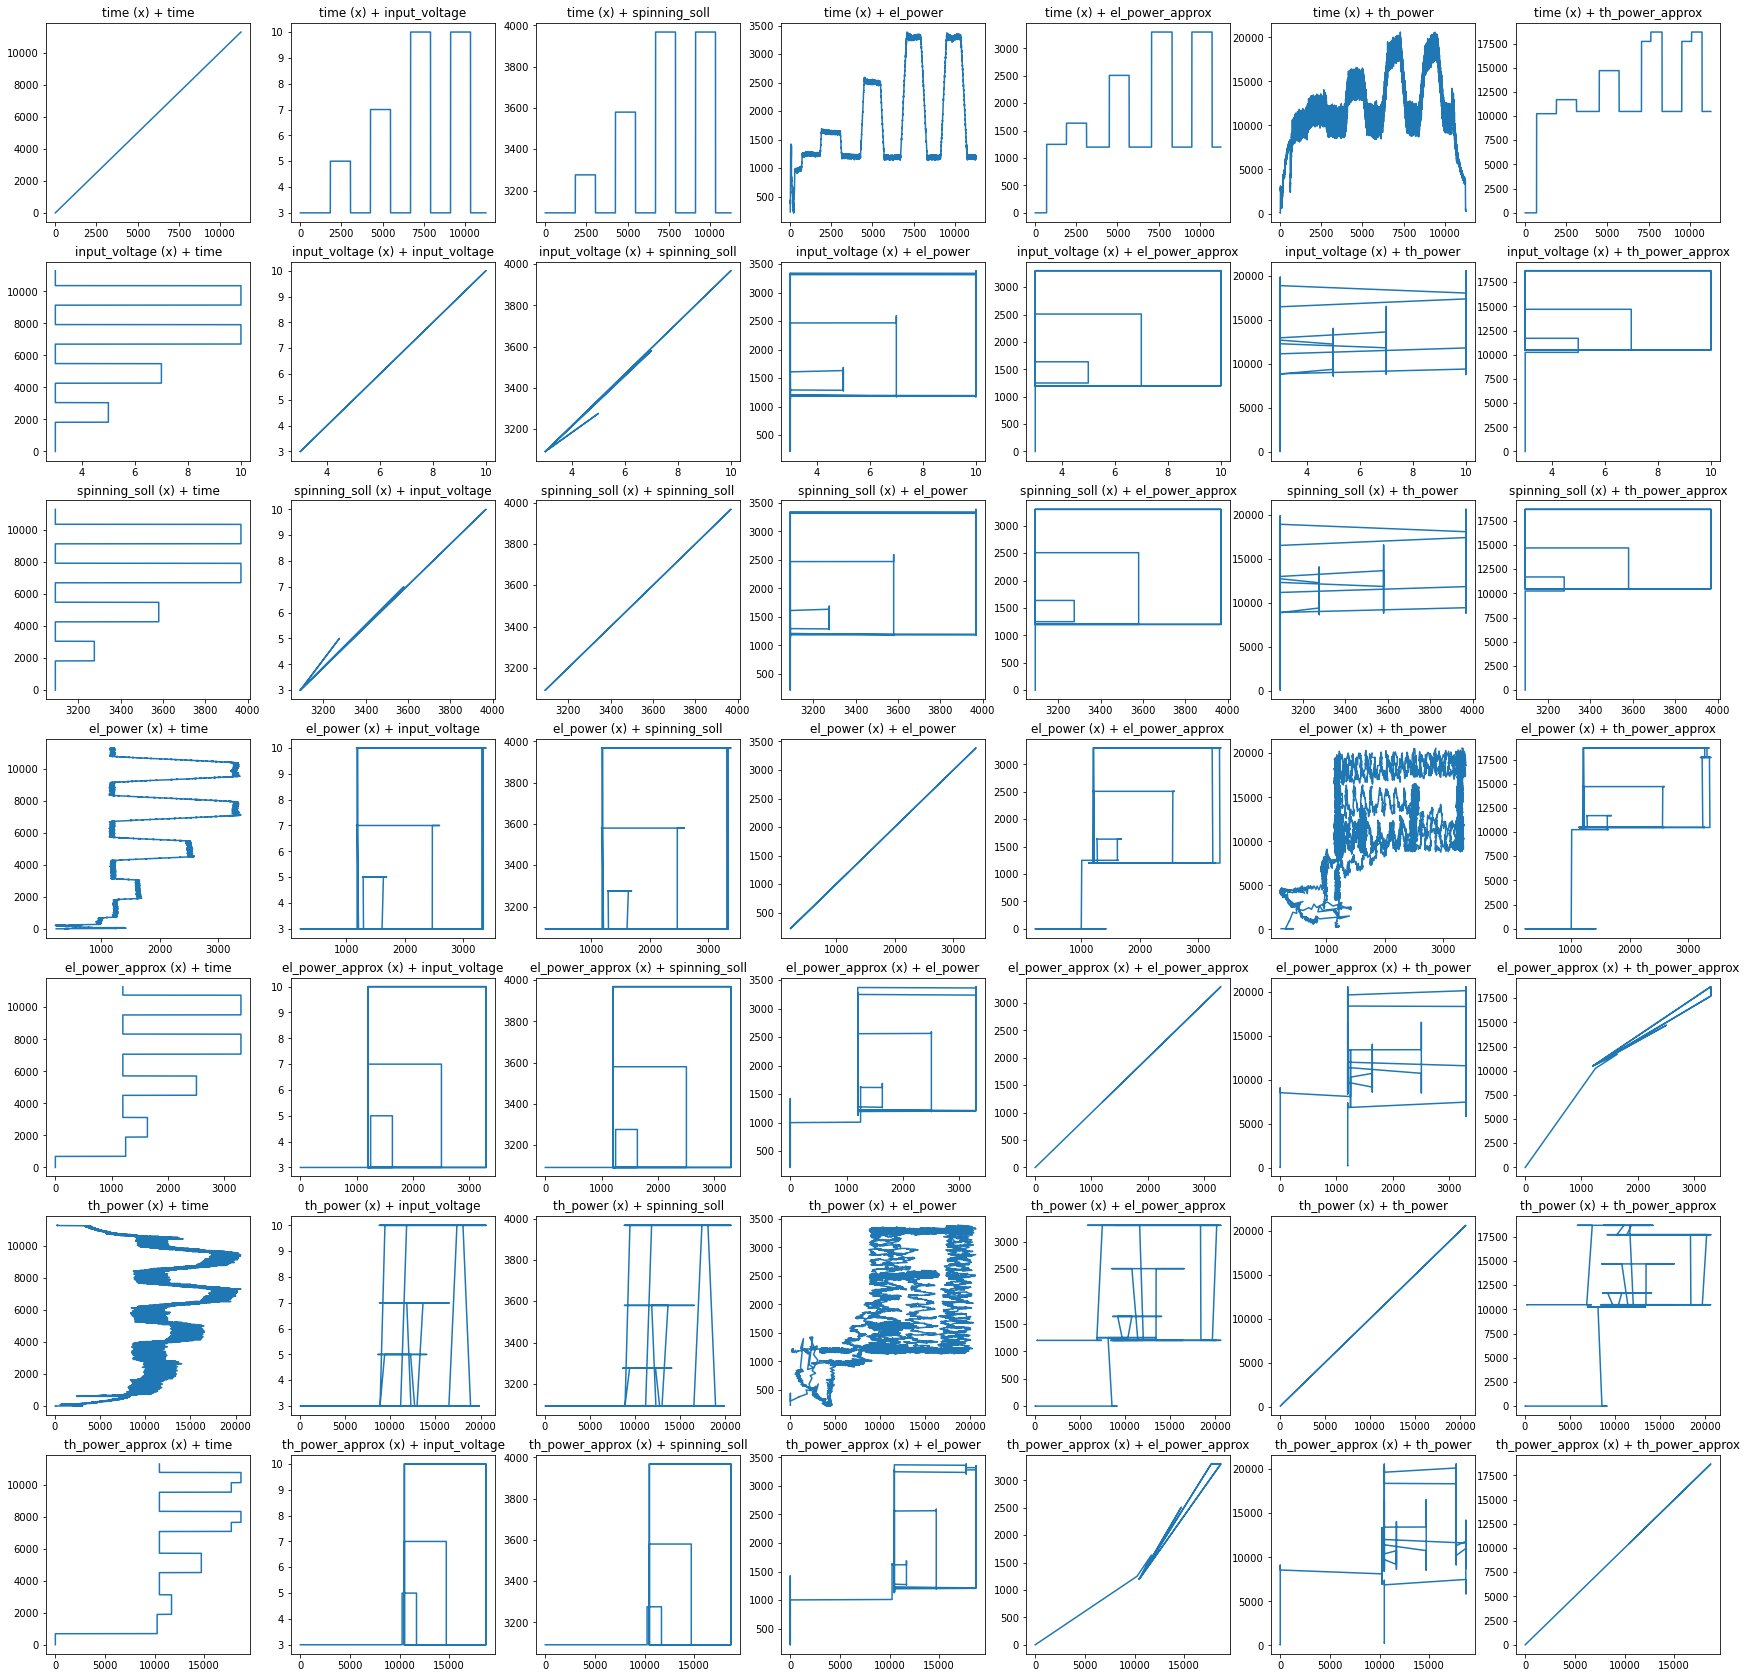

In [103]:
plotCrossPlots(df_4b)

# Prepare and Plot Data according to Test_ID_9

In [104]:
raw_data_9 = pp.openMatfiles(open_9)

Drehzahldaten_Test_ID_9.mat
Leistungdaten_Test_ID_9.mat


In [105]:
data_spinning_9 = raw_data_9['Drehzahldaten_Test_ID_9']
data_power_9 = raw_data_9['Leistungdaten_Test_ID_9']
data_9 = [data_spinning_9, data_power_9]

In [124]:
df_9 = prepData9(data_9, 12600)
df_9.to_csv(SAVE_FOLDER + 'experiment_9.csv',
         index = False, sep =  "|", encoding = "utf-8")

12600
13026


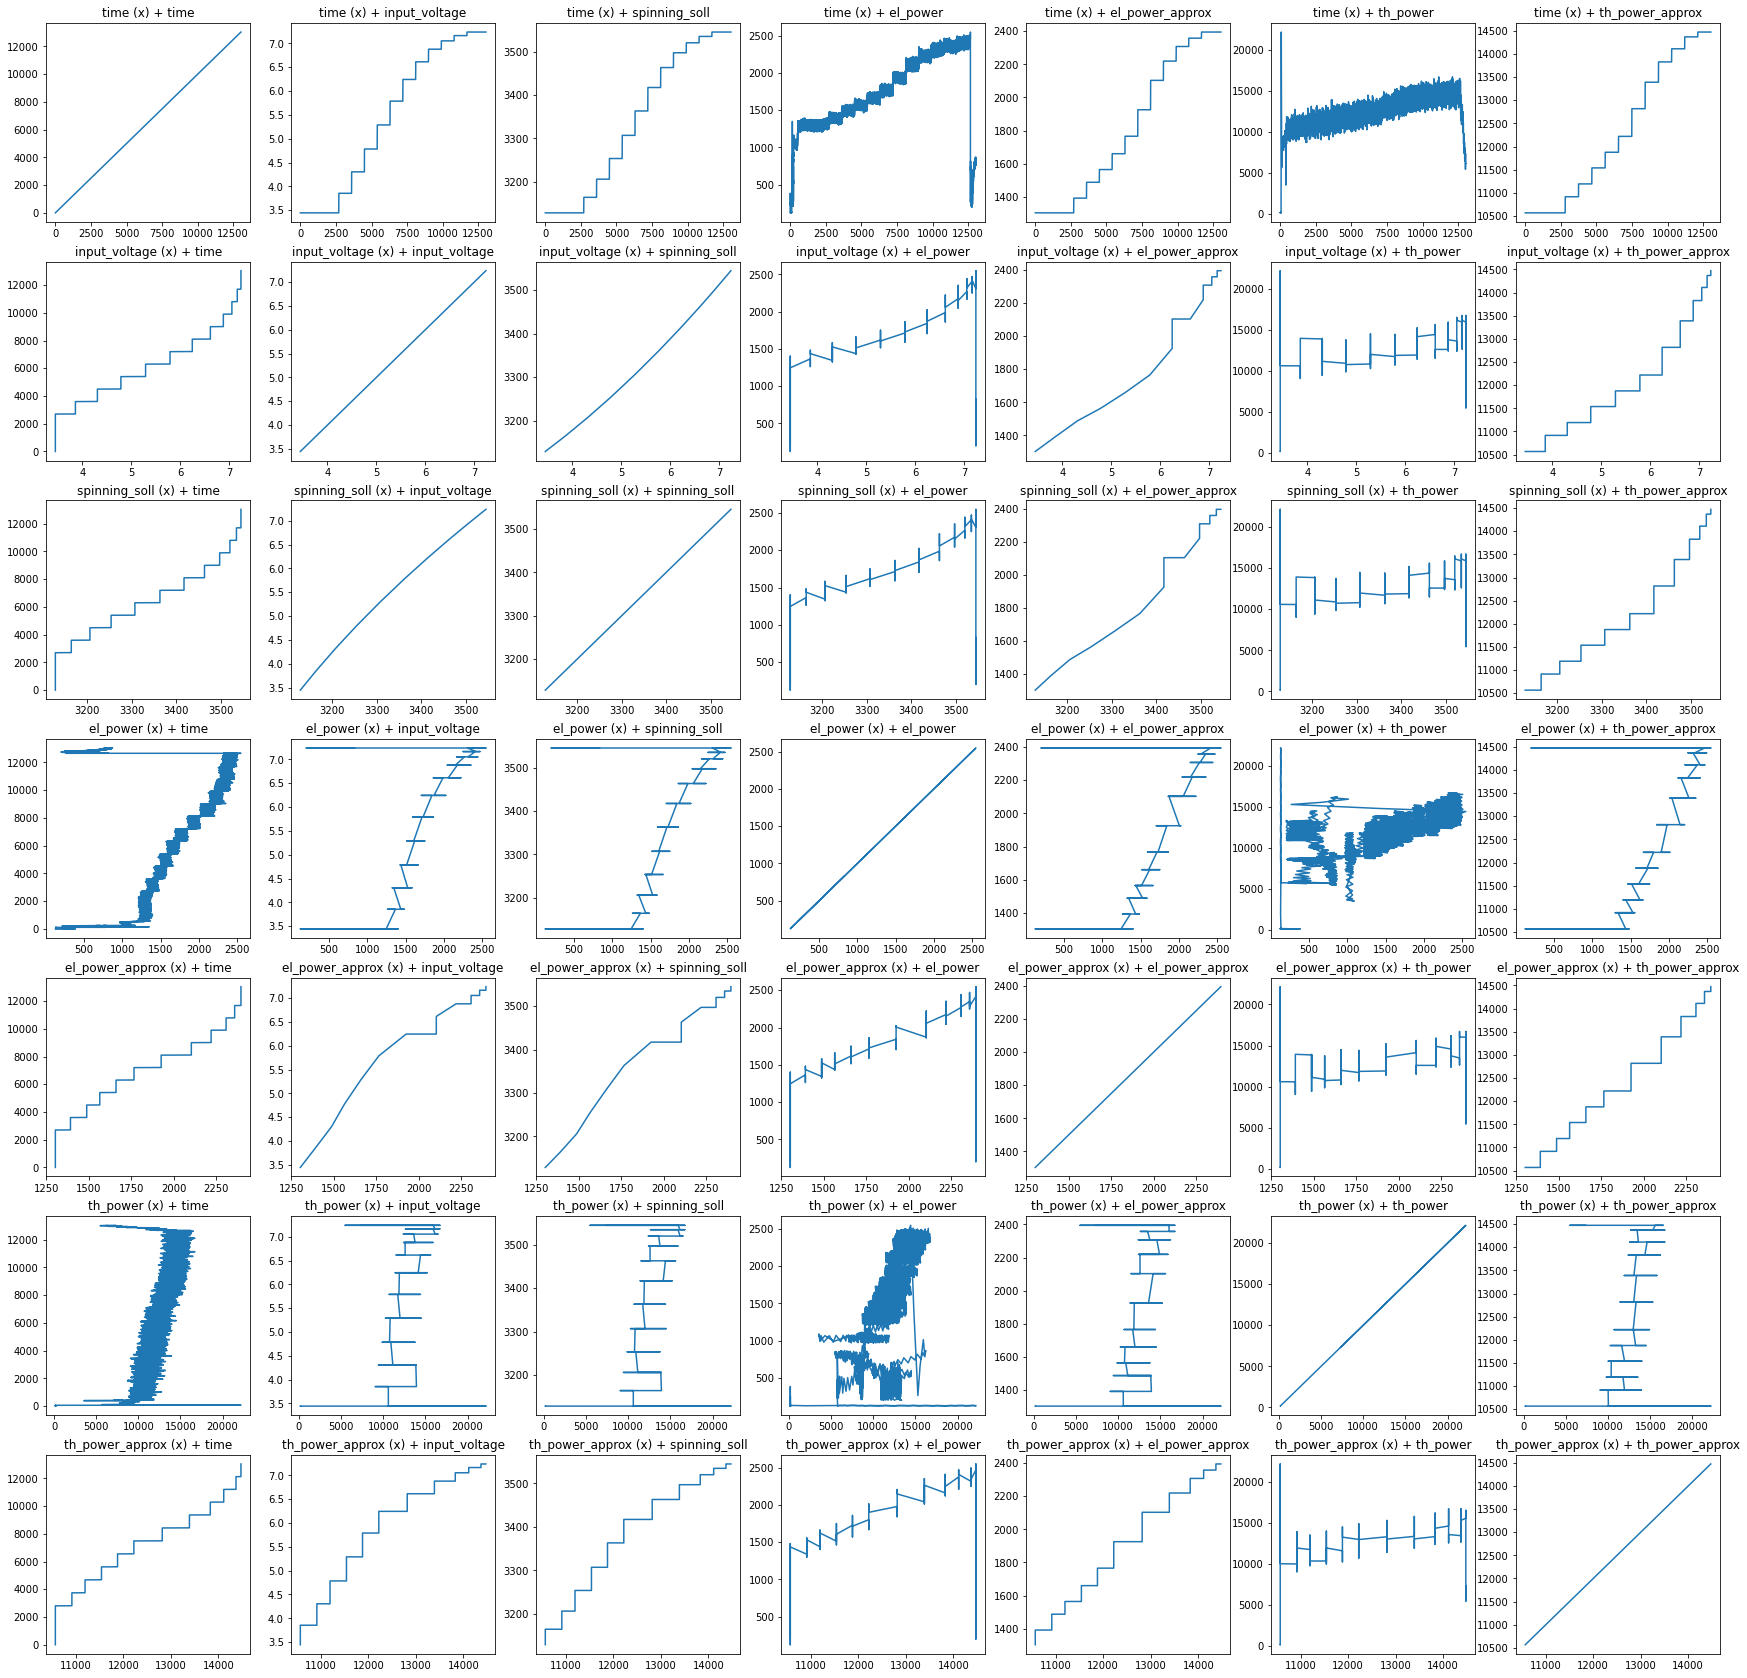

In [125]:
plotCrossPlots(df_9)